In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
import shap


import math

In [ ]:
df = pd.read_csv("../../Data/df_standardised_end_test.csv")
df = df.drop(columns = ["Unnamed: 0","X","X1.hr","X2.hr","chunk"])
df

In [ ]:
train = df.loc[df['train_test'] == "train"]
test = df.loc[df['train_test'] == "test"]

In [ ]:
y_train = train.pop("abnormal")
X_train = train
X_train = X_train.drop(columns = ["train_test"])
y_test = test.pop("abnormal")
X_test = test
X_test = X_test.drop(columns = ["train_test"])

In [6]:
def get_results(truth, prediction, df, idx):
    

    acc = accuracy_score(truth, prediction)
    f1 = f1_score(truth, prediction)
    precision = precision_score(truth, prediction)
    recall = recall_score(truth, prediction)

    df.loc[idx,:] = [acc, f1, precision, recall]

    return df


In [59]:
results = pd.DataFrame(index = ['Decision Tree'], 
                       columns = ['accuracy', 'f1', 'precision', 'recall'])

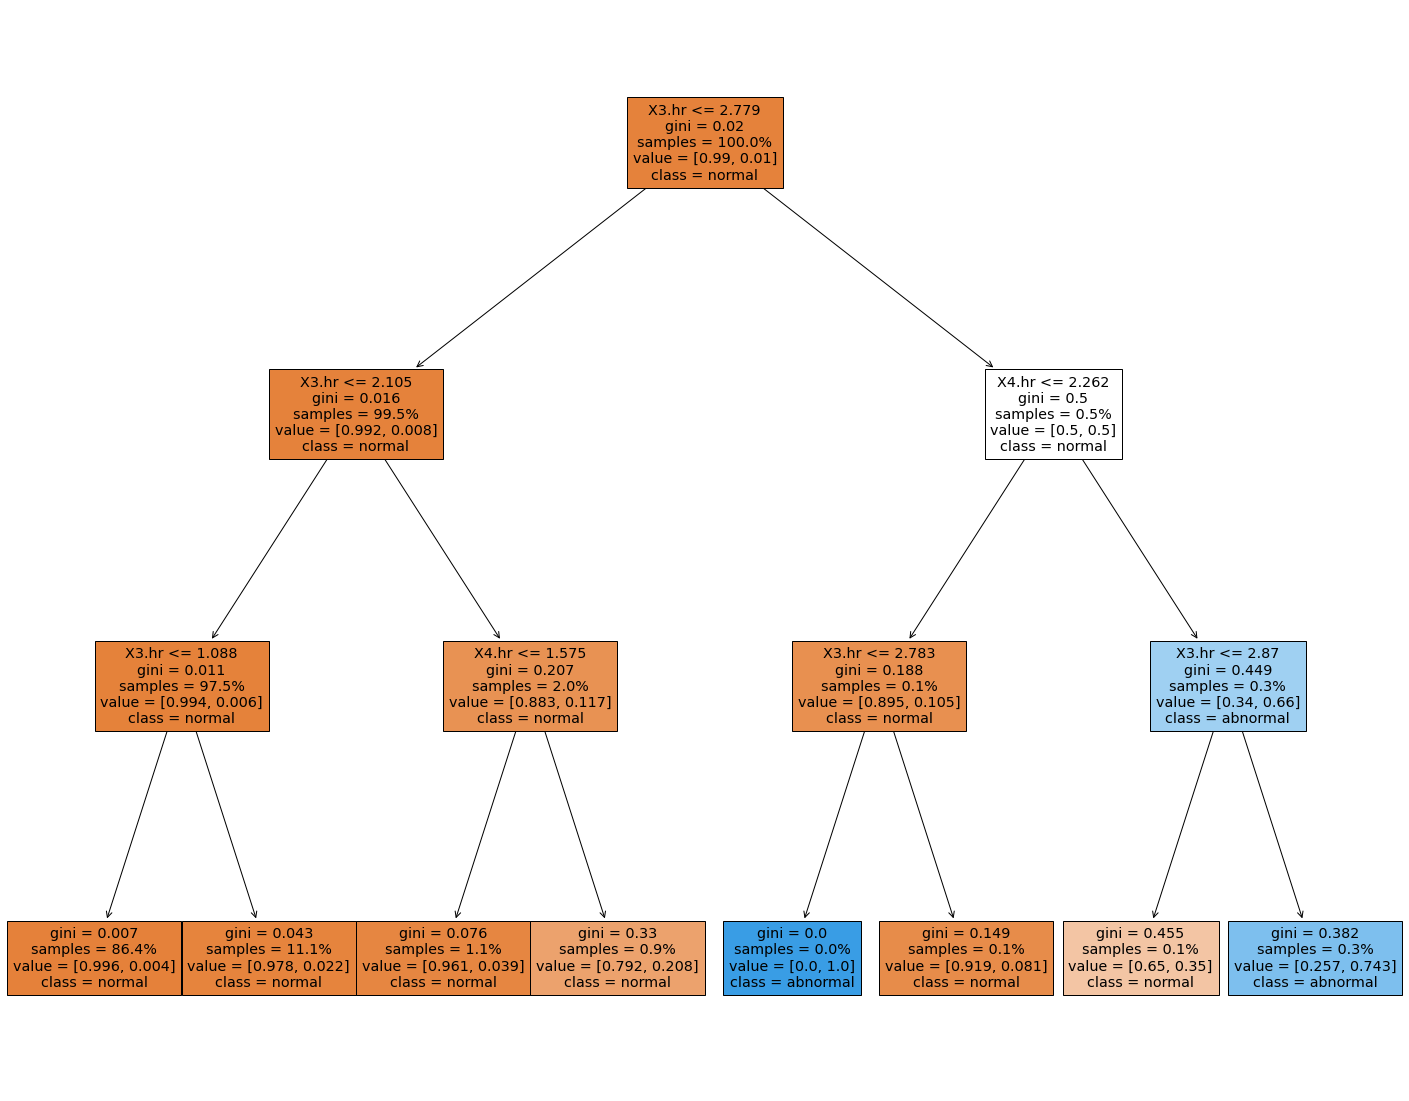

In [60]:
clf = DecisionTreeClassifier(max_depth = 3, random_state = 13)
clf.fit(X=X_train,y=y_train)

y_pred = clf.predict(X_test)

results = get_results(y_test, y_pred, results, 'Decision Tree')


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names=['normal', 'abnormal'],
                   filled=True,  proportion = True)


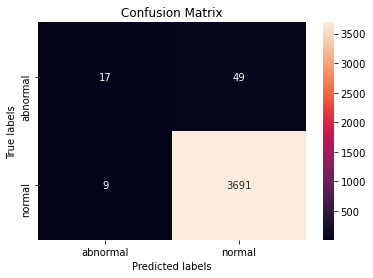

In [61]:
labels = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['abnormal', 'normal']); 
ax.yaxis.set_ticklabels(['abnormal', 'normal'])

plt.show()

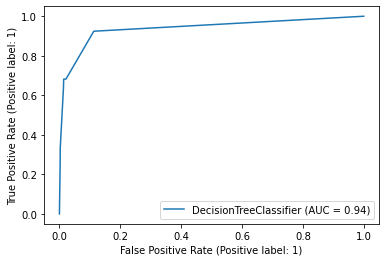

In [62]:
plot_roc_curve(clf,X_test,y_test)
plt.show()

In [63]:
y_score = clf.predict_proba(X_test)

In [64]:
n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

y_test = y_test.reset_index()
y_test = y_test.drop(columns = ["index"])
y_test = y_test.squeeze()

y_pred = pd.Series(y_pred)

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_test[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_test[indices], y_score[indices, 1])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))


sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
    confidence_lower, confidence_upper))

Bootstrap #1 ROC area: 0.927
Bootstrap #2 ROC area: 0.937
Bootstrap #3 ROC area: 0.981
Bootstrap #4 ROC area: 0.946
Bootstrap #5 ROC area: 0.953
Bootstrap #6 ROC area: 0.910
Bootstrap #7 ROC area: 0.939
Bootstrap #8 ROC area: 0.966
Bootstrap #9 ROC area: 0.938
Bootstrap #10 ROC area: 0.910
Bootstrap #11 ROC area: 0.939
Bootstrap #12 ROC area: 0.920
Bootstrap #13 ROC area: 0.926
Bootstrap #14 ROC area: 0.950
Bootstrap #15 ROC area: 0.944
Bootstrap #16 ROC area: 0.945
Bootstrap #17 ROC area: 0.940
Bootstrap #18 ROC area: 0.932
Bootstrap #19 ROC area: 0.963
Bootstrap #20 ROC area: 0.919
Bootstrap #21 ROC area: 0.905
Bootstrap #22 ROC area: 0.924
Bootstrap #23 ROC area: 0.927
Bootstrap #24 ROC area: 0.963
Bootstrap #25 ROC area: 0.920
Bootstrap #26 ROC area: 0.984
Bootstrap #27 ROC area: 0.918
Bootstrap #28 ROC area: 0.894
Bootstrap #29 ROC area: 0.951
Bootstrap #30 ROC area: 0.912
Bootstrap #31 ROC area: 0.944
Bootstrap #32 ROC area: 0.939
Bootstrap #33 ROC area: 0.934
Bootstrap #34 ROC a

Bootstrap #275 ROC area: 0.979
Bootstrap #276 ROC area: 0.934
Bootstrap #277 ROC area: 0.929
Bootstrap #278 ROC area: 0.944
Bootstrap #279 ROC area: 0.933
Bootstrap #280 ROC area: 0.948
Bootstrap #281 ROC area: 0.952
Bootstrap #282 ROC area: 0.957
Bootstrap #283 ROC area: 0.934
Bootstrap #284 ROC area: 0.920
Bootstrap #285 ROC area: 0.955
Bootstrap #286 ROC area: 0.947
Bootstrap #287 ROC area: 0.955
Bootstrap #288 ROC area: 0.963
Bootstrap #289 ROC area: 0.947
Bootstrap #290 ROC area: 0.916
Bootstrap #291 ROC area: 0.928
Bootstrap #292 ROC area: 0.947
Bootstrap #293 ROC area: 0.933
Bootstrap #294 ROC area: 0.936
Bootstrap #295 ROC area: 0.936
Bootstrap #296 ROC area: 0.938
Bootstrap #297 ROC area: 0.956
Bootstrap #298 ROC area: 0.952
Bootstrap #299 ROC area: 0.923
Bootstrap #300 ROC area: 0.939
Bootstrap #301 ROC area: 0.958
Bootstrap #302 ROC area: 0.929
Bootstrap #303 ROC area: 0.954
Bootstrap #304 ROC area: 0.962
Bootstrap #305 ROC area: 0.954
Bootstrap #306 ROC area: 0.934
Bootstra

Bootstrap #589 ROC area: 0.926
Bootstrap #590 ROC area: 0.935
Bootstrap #591 ROC area: 0.947
Bootstrap #592 ROC area: 0.940
Bootstrap #593 ROC area: 0.916
Bootstrap #594 ROC area: 0.921
Bootstrap #595 ROC area: 0.905
Bootstrap #596 ROC area: 0.929
Bootstrap #597 ROC area: 0.934
Bootstrap #598 ROC area: 0.947
Bootstrap #599 ROC area: 0.929
Bootstrap #600 ROC area: 0.959
Bootstrap #601 ROC area: 0.956
Bootstrap #602 ROC area: 0.949
Bootstrap #603 ROC area: 0.938
Bootstrap #604 ROC area: 0.952
Bootstrap #605 ROC area: 0.937
Bootstrap #606 ROC area: 0.929
Bootstrap #607 ROC area: 0.929
Bootstrap #608 ROC area: 0.925
Bootstrap #609 ROC area: 0.940
Bootstrap #610 ROC area: 0.962
Bootstrap #611 ROC area: 0.929
Bootstrap #612 ROC area: 0.924
Bootstrap #613 ROC area: 0.906
Bootstrap #614 ROC area: 0.950
Bootstrap #615 ROC area: 0.939
Bootstrap #616 ROC area: 0.936
Bootstrap #617 ROC area: 0.944
Bootstrap #618 ROC area: 0.912
Bootstrap #619 ROC area: 0.936
Bootstrap #620 ROC area: 0.938
Bootstra

Bootstrap #904 ROC area: 0.931
Bootstrap #905 ROC area: 0.908
Bootstrap #906 ROC area: 0.945
Bootstrap #907 ROC area: 0.928
Bootstrap #908 ROC area: 0.956
Bootstrap #909 ROC area: 0.970
Bootstrap #910 ROC area: 0.948
Bootstrap #911 ROC area: 0.953
Bootstrap #912 ROC area: 0.954
Bootstrap #913 ROC area: 0.937
Bootstrap #914 ROC area: 0.955
Bootstrap #915 ROC area: 0.938
Bootstrap #916 ROC area: 0.967
Bootstrap #917 ROC area: 0.959
Bootstrap #918 ROC area: 0.933
Bootstrap #919 ROC area: 0.944
Bootstrap #920 ROC area: 0.899
Bootstrap #921 ROC area: 0.934
Bootstrap #922 ROC area: 0.953
Bootstrap #923 ROC area: 0.938
Bootstrap #924 ROC area: 0.939
Bootstrap #925 ROC area: 0.936
Bootstrap #926 ROC area: 0.884
Bootstrap #927 ROC area: 0.959
Bootstrap #928 ROC area: 0.930
Bootstrap #929 ROC area: 0.909
Bootstrap #930 ROC area: 0.958
Bootstrap #931 ROC area: 0.963
Bootstrap #932 ROC area: 0.968
Bootstrap #933 ROC area: 0.956
Bootstrap #934 ROC area: 0.913
Bootstrap #935 ROC area: 0.947
Bootstra

In [65]:
for i in range(100):
    clf = DecisionTreeClassifier(max_depth = 3, class_weight={0:1, 1:i}, random_state = 13)
    clf.fit(X=X_train,y=y_train)

    y_pred = clf.predict(X_test)

    results = get_results(y_test, y_pred, results, i)


    #fig = plt.figure(figsize=(25,20))
    #_ = tree.plot_tree(clf, 
                   #feature_names=X_train.columns,  
                   #class_names=['normal', 'abnormal'],
                   #filled=True,  proportion = True)


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [69]:
results.sort_values('f1', ascending=False)

,accuracy,f1,precision,recall
4,0.984599,0.567164,0.558824,0.575758
5,0.984599,0.567164,0.558824,0.575758
6,0.980882,0.555556,0.46875,0.681818
7,0.980882,0.555556,0.46875,0.681818
19,0.980616,0.552147,0.463918,0.681818
...,...,...,...,...
73,0.886617,0.222222,0.126294,0.924242
72,0.886617,0.222222,0.126294,0.924242
71,0.886617,0.222222,0.126294,0.924242
99,0.886617,0.222222,0.126294,0.924242


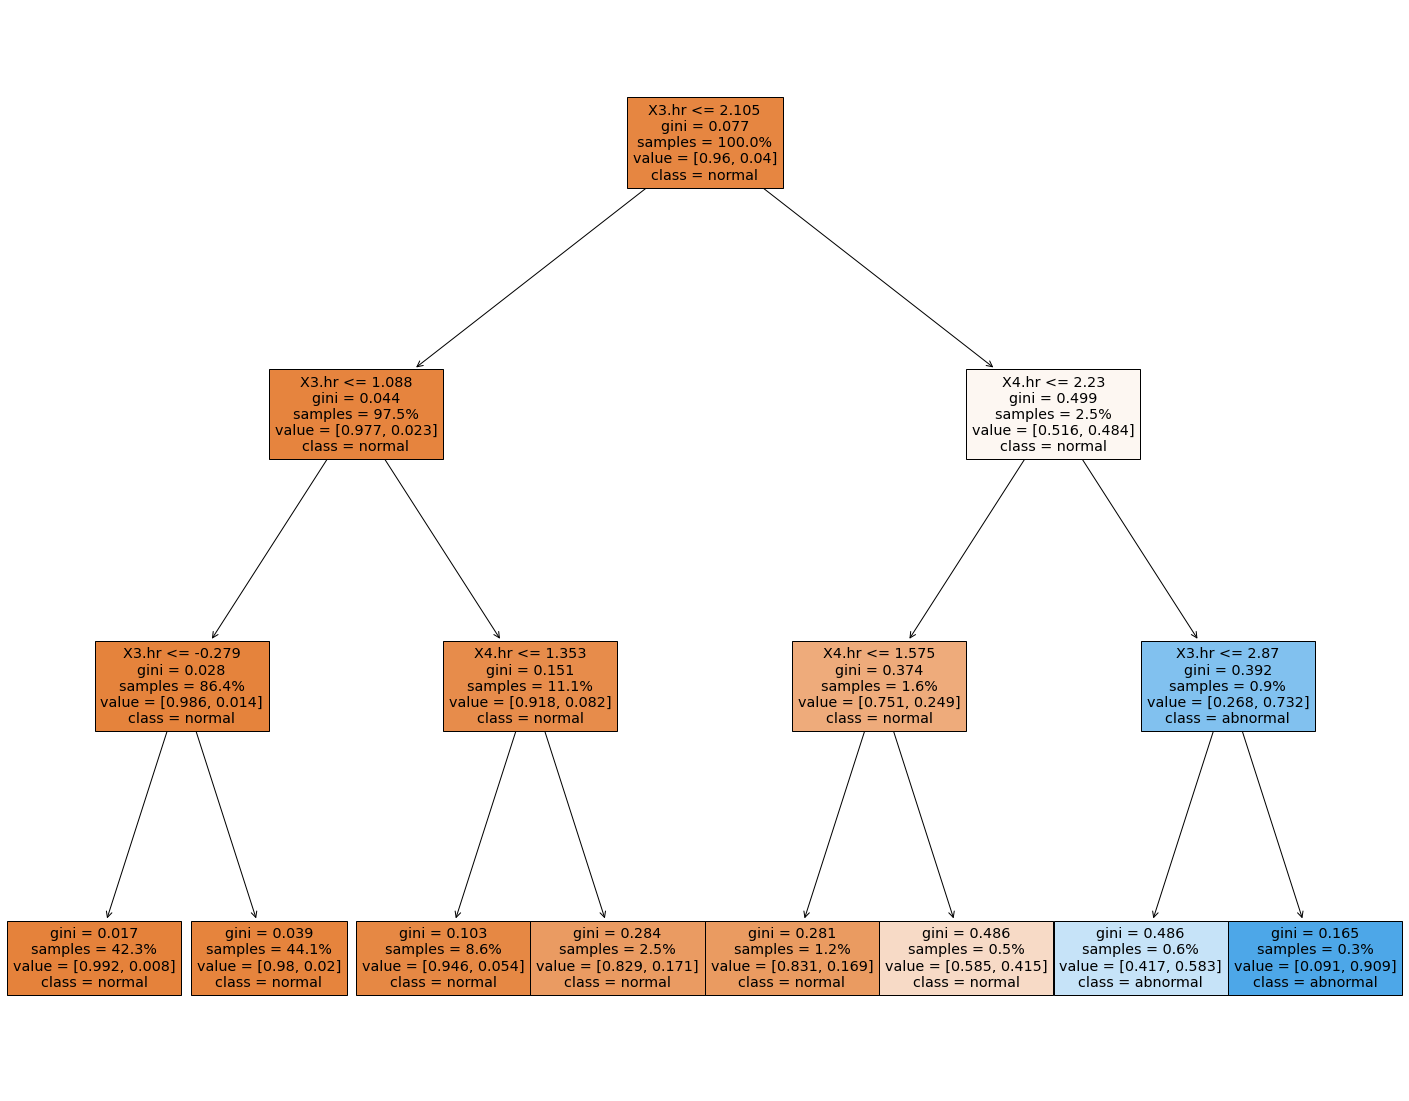

In [70]:
clf = DecisionTreeClassifier(max_depth = 3, class_weight={0:1, 1:4}, random_state = 13)
clf.fit(X=X_train,y=y_train)

y_pred = clf.predict(X_test)

results = get_results(y_test, y_pred, results, i)


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                feature_names=X_train.columns,  
                class_names=['normal', 'abnormal'],
                filled=True,  proportion = True)

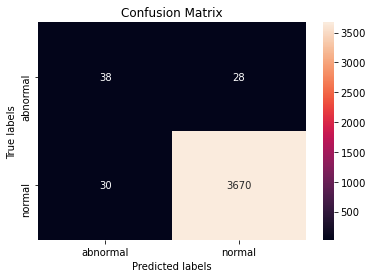

In [71]:
labels = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['abnormal', 'normal']); 
ax.yaxis.set_ticklabels(['abnormal', 'normal'])

plt.show()